Importing all the required libraries

In [1]:
#Importing all the libraries needed
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

Loading the train and asset_details from csv files into the pandas dataframe

In [2]:
#Loading data from csv files to pandas dataframe
train = pd.read_csv('C:/Juhner/NEU/Capstone/Cryptocurrency project/Data/train.csv')
asset = pd.read_csv('C:/Juhner/NEU/Capstone/Cryptocurrency project/Data/asset_details.csv')

Generating a list of all asset(cryptocurrency) names

In [3]:
#List of all cryptocurrency names
crypto_list = asset['Asset_Name'].tolist()

Adding a column 'Date' that converts timestamp to string representing local time. We set this Date column as index.

In [4]:
#Converting timestamp to readable date format
train['Date'] = [time.ctime(int(i)) for i in train['timestamp'].tolist()]
train.index = train['Date']

We map each asset in the train dataframe to the asset name in asset_details and add a column with the asset name in the train dataframe.

In [5]:
crypto_id = dict()
for i, j in zip(asset['Asset_ID'].tolist(), asset['Asset_Name'].tolist()):
    crypto_id[i]=j
train['Asset_Name'] = [crypto_id[i] for i in train['Asset_ID'].tolist()]

We plot the 'Open' value for each of the cryptocurrency over time

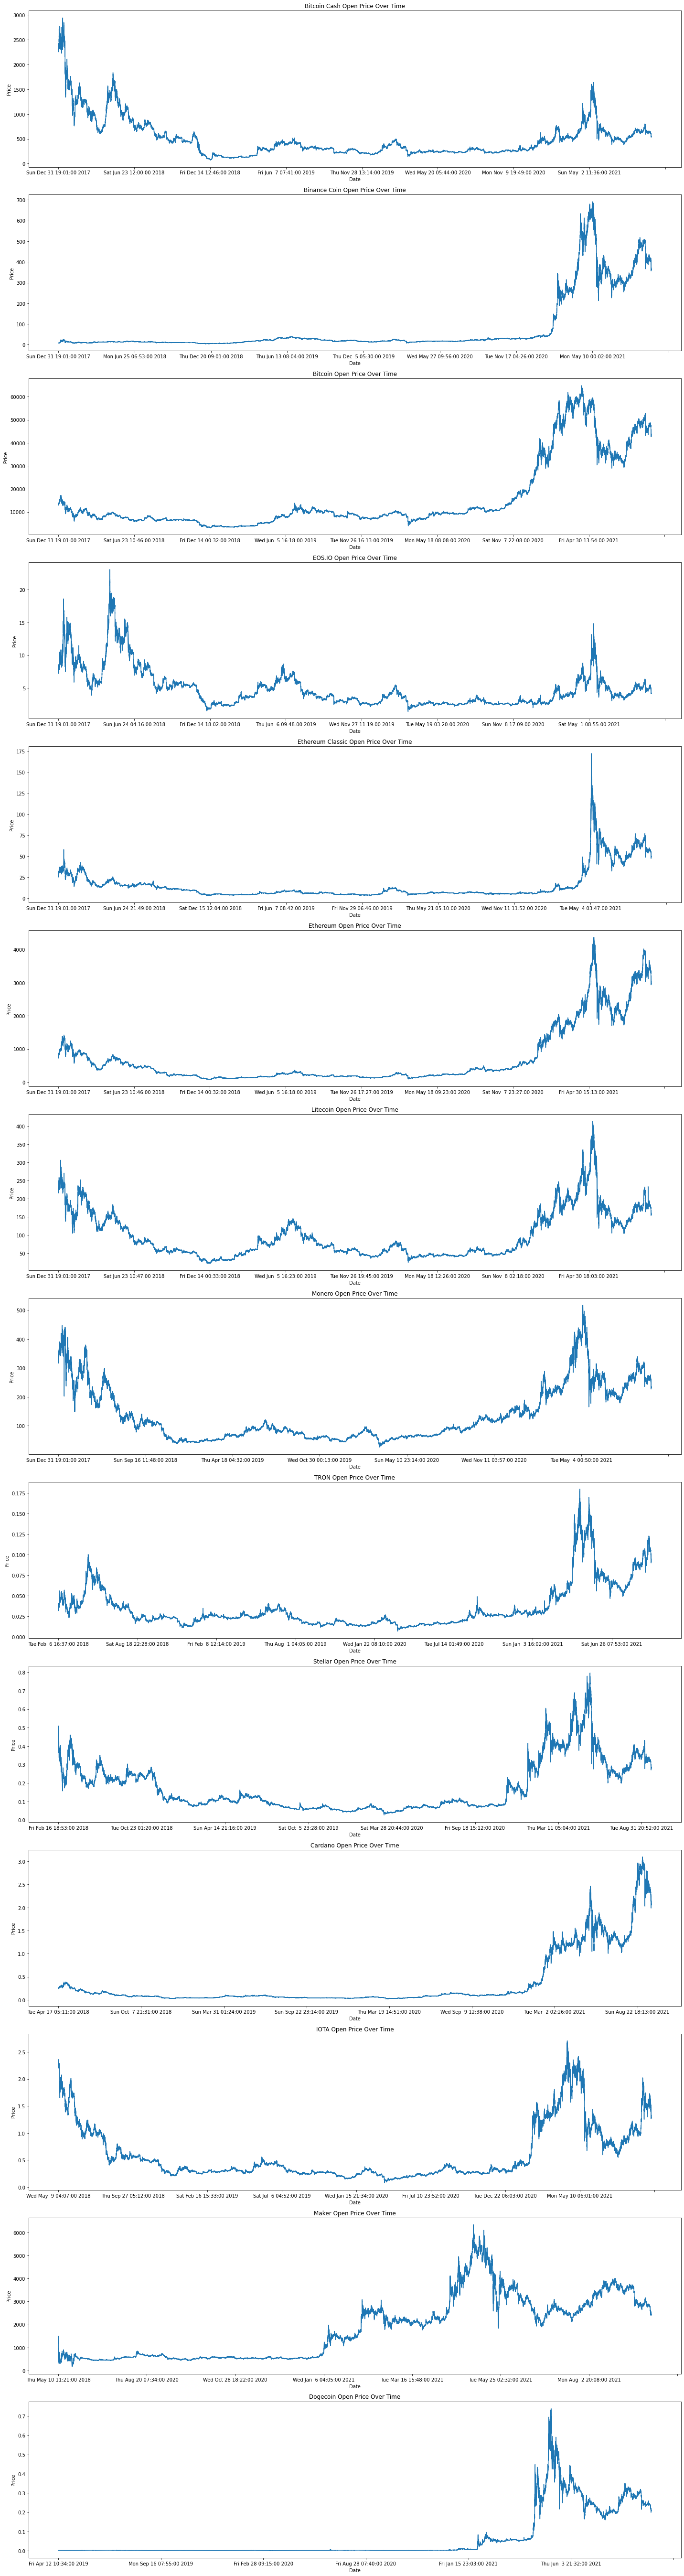

In [6]:
plt.figure(figsize=(20, 75))
for i,crypto in enumerate(crypto_list,1):
    plt.subplot(14, 1, i)
    title = str(crypto)+' Open Price Over Time'
    ylabel='Price'
    train_fil = train[train['Asset_Name'] == crypto]
    train_fil['Open'].plot(title=title)
    plt.ylabel(ylabel)
    plt.tight_layout()

We are more interested to see the trends for Bitcoin and Ethereum in 2021. We plot the closing values of these two over time in 2021. 

In [7]:
train_2021 = train[train['Date'].str.contains('2021')]

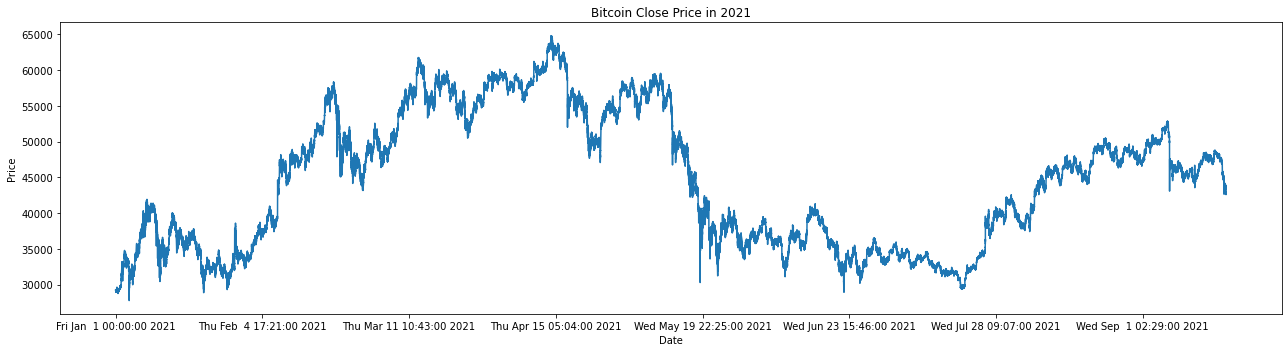

In [8]:
train_fil = train_2021[train_2021['Asset_Name'] == 'Bitcoin']
plt.figure(figsize=(18,5))
train_fil['Close'].plot(title='Bitcoin Close Price in 2021')
plt.ylabel('Price')
plt.tight_layout()

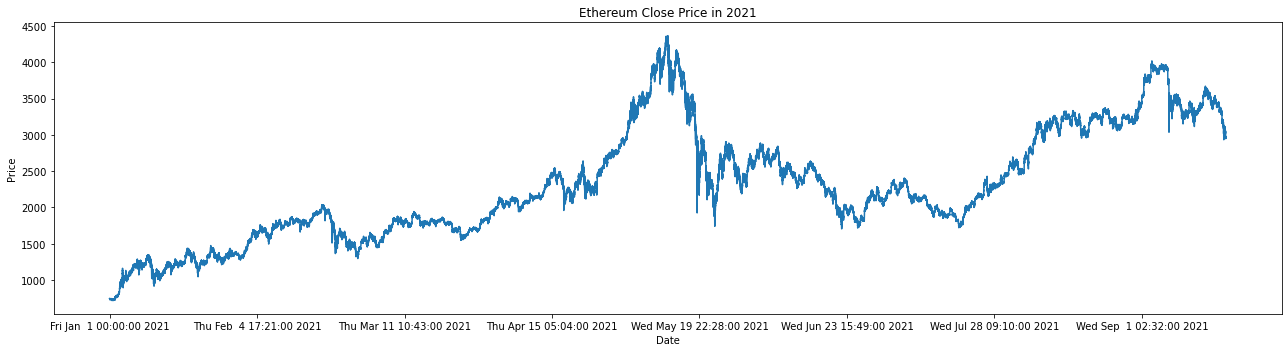

In [9]:
train_fil = train_2021[train_2021['Asset_Name'] == 'Ethereum']
plt.figure(figsize=(18,5))
train_fil['Close'].plot(title='Ethereum Close Price in 2021')
plt.ylabel('Price')
plt.tight_layout()

This plot shows us the daily percentage change for each of the cryptocurrency 

<ipython-input-10-dba1d8ad6e71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_df['Daily Return'] = crypto_df['Close'].pct_change()
<ipython-input-10-dba1d8ad6e71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_df['Daily Return'] = crypto_df['Close'].pct_change()
<ipython-input-10-dba1d8ad6e71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

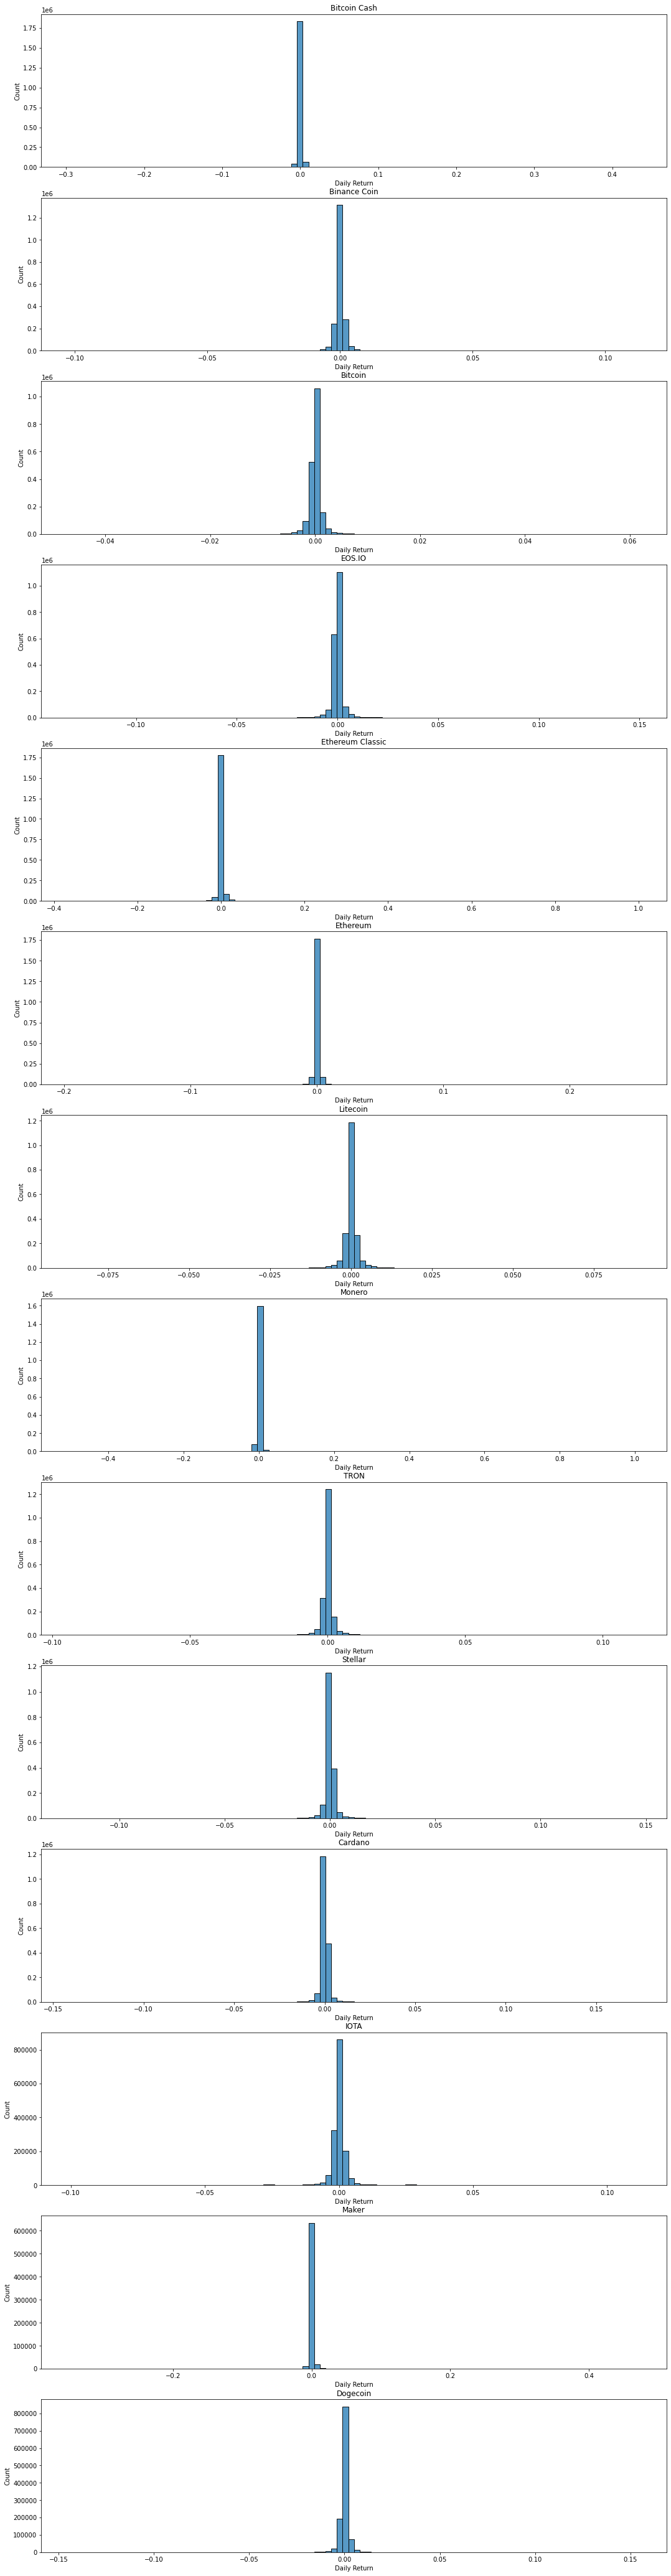

In [10]:
plt.figure(figsize=(18, 75))

for i, crypto in enumerate(crypto_list, 1):
    plt.subplot(14, 1, i)
    crypto_df = train[train['Asset_Name']==crypto]
    crypto_df['Daily Return'] = crypto_df['Close'].pct_change()
    sns.histplot(crypto_df['Daily Return'].dropna(), bins=100)
    plt.title(f'{crypto_list[i - 1]}')

We create a dataframe that has samples of closing values for every cryptocurrency from the same dates

In [11]:
closing_df = pd.DataFrame()
for i, crypto in enumerate(crypto_list, 1):
    crypto_df = train[train['Asset_Name']==crypto]
    closing_df[crypto] = crypto_df['Close'].tolist()[:670497]

We create another dataframe that has the daily returns from the previous closing value samples  

In [12]:
crypto_rets = closing_df.pct_change()

We plot the correlation matrix for all the cryptocurrencies

<AxesSubplot:>

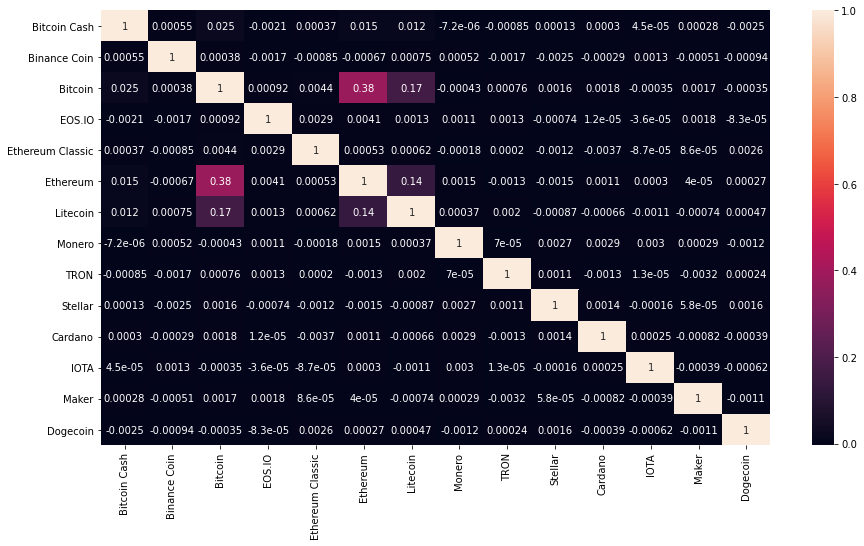

In [13]:
#Correlation matrix for daily returns
plt.figure(figsize=(15,8))
sns.heatmap(crypto_rets.corr(), annot=True)

For Bitcoin and Ethereum we create two dataframes and set the timestamp as index 

In [14]:
btc_df = train[train['Asset_ID'] == 1].set_index('timestamp')
eth_df = train[train['Asset_ID'] == 6].set_index('timestamp')

Below is the function to compute log returns 

In [15]:
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

We plot correlation between Bitcoin and Ethereum over time

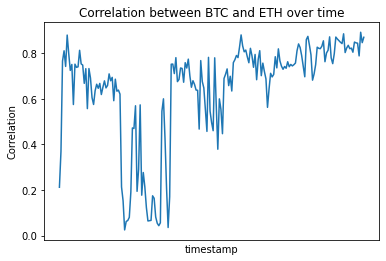

In [16]:
lret_btc_long = log_return(btc_df.Close)[1:]
lret_eth_long = log_return(eth_df.Close)[1:]
lret_btc_long.rename('lret_btc', inplace=True)
lret_eth_long.rename('lret_eth', inplace=True)
two_assets = pd.concat([lret_btc_long, lret_eth_long],axis = 1)

corr_time = two_assets.groupby(two_assets.index//(10000*60)).corr().loc[:,"lret_btc"].loc[:,"lret_eth"]

corr_time.plot();
plt.xticks([])
plt.ylabel("Correlation")
plt.title("Correlation between Bitcoin and Etheruem over time");